Challenge Set 4  
Topic:        Linear Regression  
Date:         07/21/2016  
Name:         Avi Grunwald  
Worked with:  

In [74]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import cross_validation as cv
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
x = np.random.random(100)

epsilon = np.random.normal(0, 1, 100)
# y = B0 + B1*log(x) + epsilon

In [11]:
y = [(3 + 5*np.log(x[i])+epsilon[i]) for i in range(100)]

In [21]:
df1 = pd.DataFrame({'y': y, 'x': x, 'x2':x**2, 'xlog': np.log(x)})

In [23]:
df1.head()

,x,x2,xlog,y
0,0.860911,0.741168,-0.149764,2.405791
1,0.793278,0.629291,-0.231581,0.535986
2,0.836182,0.699200,-0.178909,1.855336
3,0.332593,0.110618,-1.100836,-1.976203
4,0.344961,0.118998,-1.064325,-1.591130


In [30]:
y, X = dmatrices('y ~ x2', data=df1, return_type='dataframe')
model = LinearRegression()
model.fit(X, y)
print ('Quadratic Score: {}'.format(model.score(X, y)) )
predictions = model.predict(X)

Quadratic Score: 0.4043097911316943


In [31]:
y, X = dmatrices('y ~ xlog', data=df1, return_type='dataframe')
model = LinearRegression()
model.fit(X, y)
print ('Log Score: {}'.format(model.score(X, y)) )
predictions = model.predict(X)

Log Score: 0.9765279776346589


**Challenge 2**

In [49]:
# B2*x^2
y = [(3 + 5*x[i] + 1.25*x[i]**2 + epsilon[i]) for i in range(100)]

In [35]:
df2 = pd.DataFrame( {'y': y, 'x': x, 'x2':x**2} )
y, X = dmatrices('y ~ x2', data=df2, return_type='dataframe')
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)
model = LinearRegression().fit(x_train, y_train)

In [42]:
print ('MSE on Training Set: {}'.format(metrics.mean_squared_error(y_train, model.predict(x_train))) )
print ('MSE on Test Set: {}'.format(metrics.mean_squared_error(y_test, model.predict(x_test))) )

MSE on Training Set: 0.8856451992480612
MSE on Test Set: 1.2251230150408434


**Challenge 3**

In [52]:
df3 = pd.DataFrame( {'y': y, 'x0': x**0, 'x1':x**1, 'x2':x**2, 'x3':x**3, 
                     'x4':x**4, 'x5':x**5, 'x6':x**6, 'x7':x**7} )

In [ ]:
# mse_train = []
# mse_test = []
# scores = []
# aic = []

# for i in range(8):
#     y, X = dmatrices('y ~ x{}'.format(i), data=df3, return_type='dataframe')
#     x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)
#     model = LinearRegression().fit(x_train, y_train)
#     mse_train.append(metrics.mean_squared_error(y_train, model.predict(x_train)))
#     mse_test.append(metrics.mean_squared_error(y_test, model.predict(x_test)))
#     scores.append(model.score(X, y))

In [68]:
mse_train = []
mse_test = []
scores = []
aic = []

for i in range(8):
    y, X = dmatrices('y ~ x{}'.format(i), data=df3, return_type='dataframe')
    x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)
    model = sm.OLS(y_train, x_train)
    results = model.fit()
    mse_train.append(metrics.mean_squared_error(y_train, results.predict(x_train)))
    mse_test.append(metrics.mean_squared_error(y_test, results.predict(x_test)))
    scores.append(results.rsquared)
    aic.append(results.aic)

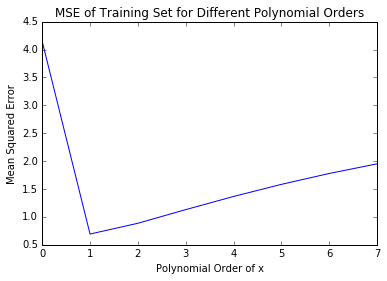

In [80]:
plt.plot(range(8), mse_train)
plt.xlabel('Polynomial Order of x')
plt.ylabel('Mean Squared Error')
plt.title('MSE of Training Set for Different Polynomial Orders')
plt.show()

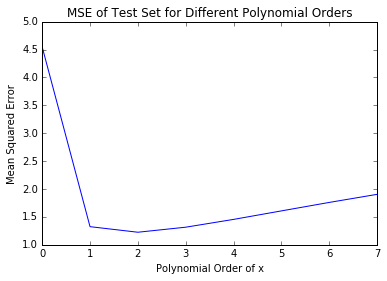

In [81]:
plt.plot(range(8), mse_test)
plt.xlabel('Polynomial Order of x')
plt.ylabel('Mean Squared Error')
plt.title('MSE of Test Set for Different Polynomial Orders')
plt.show()

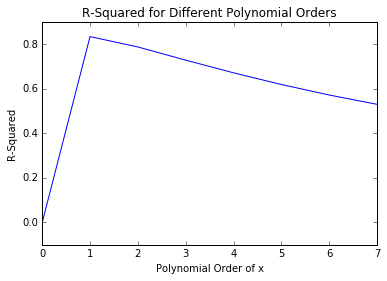

In [82]:
plt.plot(range(8), scores)
plt.xlabel('Polynomial Order of x')
plt.ylabel('R-Squared')
plt.title('R-Squared for Different Polynomial Orders')
plt.show()

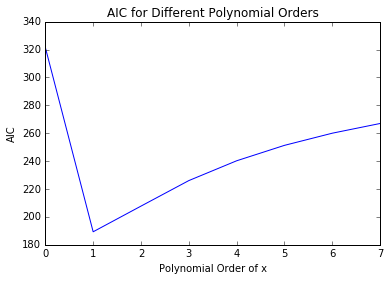

In [83]:
plt.plot(range(8), aic)
plt.xlabel('Polynomial Order of x')
plt.ylabel('AIC')
plt.title('AIC for Different Polynomial Orders')
plt.show()

**Challenge 4**

In [102]:
y, X = dmatrices('y ~ x2', data=df2, return_type='dataframe')
x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.25,random_state=1234)
lc_mse_train = []
lc_mse_test = []

for m in range(5, len(x_train)+1, 5):
    model = LinearRegression().fit(x_train[:m], y_train[:m])
    lc_mse_train.append(metrics.mean_squared_error(y_train[:m], model.predict(x_train[:m])))
    lc_mse_test.append(metrics.mean_squared_error(y_test, model.predict(x_test)))

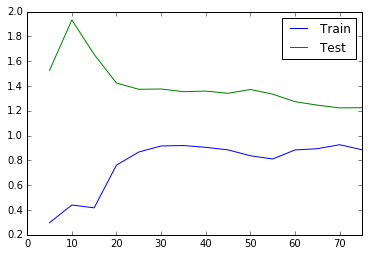

In [103]:
plt.plot(range(5, len(x_train)+1, 5), lc_mse_train, label='Train')
plt.plot(range(5, len(x_train)+1, 5), lc_mse_test, label='Test')
plt.xlim(xmin=0, xmax=75)
plt.legend()
plt.show()

In [104]:
[x for x in range(5, len(x_train)+1, 5)]

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]